In [62]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [63]:
df = pd.read_csv("test.csv")
print(df['review'])

0        Great danger, cool, motif and cantik2 jg model...
1                         One of the shades don't fit well
2                                         Very comfortable
3        Fast delivery. Product expiry is on Dec 2022. ...
4        it's sooooo cute! i like playing with the glit...
                               ...                        
60422    Product has been succesfully ordered and shipp...
60423    Opening time a little scared. Fear dalemnya de...
60424     The product quality is excellent. The origina...
60425               They 're holding up REALLY well also .
60426    Rapid response and detail ...                 ...
Name: review, Length: 60427, dtype: object


In [64]:
#CLEAN TEXT
def cleanText(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub('[!@#$.,]', '', text)
    return text

df['review']= df['review'].apply(cleanText)
df

,review_id,review
0,1,Great danger cool motif and cantik2 jg models ...
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery Product expiry is on Dec 2022 Pr...
4,5,it's sooooo cute i like playing with the glitt...
...,...,...
60422,60423,Product has been succesfully ordered and shipp...
60423,60424,Opening time a little scared Fear dalemnya des...
60424,60425,The product quality is excellent The original...
60425,60426,They 're holding up REALLY well also


In [65]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['review'].apply(getSubjectivity)
df['Polarity'] = df['review'].apply(getPolarity)
df

,review_id,review,Subjectivity,Polarity
0,1,Great danger cool motif and cantik2 jg models ...,0.558333,0.263889
1,2,One of the shades don't fit well,0.400000,0.400000
2,3,Very comfortable,1.000000,0.520000
3,4,Fast delivery Product expiry is on Dec 2022 Pr...,0.350000,0.100000
4,5,it's sooooo cute i like playing with the glitt...,0.580000,0.280000
...,...,...,...,...
60422,60423,Product has been succesfully ordered and shipp...,0.650000,0.433333
60423,60424,Opening time a little scared Fear dalemnya des...,0.450000,0.006250
60424,60425,The product quality is excellent The original...,0.818000,0.821000
60425,60426,They 're holding up REALLY well also,0.200000,0.200000


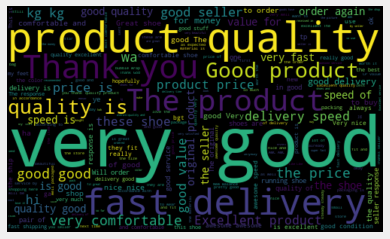

In [66]:
allWords = ' '.join([ review for review in df['review']])
wordCloud = WordCloud(width = 500,height =300,random_state=21,max_font_size=199).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
# BINTANG 5 4 3 2 1 
def getAnalysis(score):
    if score<0:
        return 1
    elif score ==0:
        return 4
    else:
        return 5
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,review_id,review,Subjectivity,Polarity,Analysis
0,1,Great danger cool motif and cantik2 jg models ...,0.558333,0.263889,5
1,2,One of the shades don't fit well,0.400000,0.400000,5
2,3,Very comfortable,1.000000,0.520000,5
3,4,Fast delivery Product expiry is on Dec 2022 Pr...,0.350000,0.100000,5
4,5,it's sooooo cute i like playing with the glitt...,0.580000,0.280000,5
...,...,...,...,...,...
60422,60423,Product has been succesfully ordered and shipp...,0.650000,0.433333,5
60423,60424,Opening time a little scared Fear dalemnya des...,0.450000,0.006250,5
60424,60425,The product quality is excellent The original...,0.818000,0.821000,5
60425,60426,They 're holding up REALLY well also,0.200000,0.200000,5


In [68]:
#conveert to csv 
list = df[['review_id','Analysis']].values.tolist()
df = pd.DataFrame(list, columns=["review_id", "rating"])
df.to_csv('as2.csv', index=False)